# Real Estate

## Defining the Question

## Reading the Data

### a) Specifying the Question

Hass Consulting Company which is a real estate leader would like to know factors that affect housing prices using the given information on real estate properties that was collected over the past few months.
- Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

This project will be success if we will be able draw insights from the given datasets, also we will be able to answer the question required and create a workable model.

### c) Understanding the context

### d) Recording the Experimental Design

The project was undertaken using the following design Datasets(real estate dataset)

Load dataset

Data Cleaning

Performing EDA

Feature Engineering

Multiple Linear Regression

Quantile Regression

Ridge Regression

Lasso Regression

Elastic Net Regression

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

### e) Data Relevance

The relavance of our data will be answered by the following questions.

Did we get correct insights?

How accurate is the data at predicting the price?

Was the dataset sufficient?

## Reading the Data

In [ ]:
# Import libraries
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [ ]:
# Load dataset
# 
estate=pd.read_csv('/content/drive/MyDrive/Core_Week_7/IP_house_data.csv')
estate

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Checking the Data

In [ ]:
# Determining the no. of records in our dataset in dataset
#
# Dataset has 21613 rows and 20 columns 

estate.shape

(21613, 20)

In [ ]:
# Previewing the top details of real estate of our dataset
#
estate.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the last details of real estate of our dataset
#
estate.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking whether each column has an appropriate datatype
#
estate.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Tidying the Dataset

In [ ]:
# Identify if there Missing Data
#
estate.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Check for duplicates 
# 
estate.duplicated().sum()

3

In [ ]:
# Drop duplicates
# 
estate.drop_duplicates(inplace=True)

In [ ]:
# check if duplicates are still available
estate.duplicated().sum()

0

In [ ]:
estate.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [ ]:
# drop irrelevant columns
estate.drop(['id','lat','long'],axis=1,inplace=True)
estate.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062


In [ ]:
# Checking for outliers
# 
Q1=estate.quantile(0.05)
Q3=estate.quantile(0.95)
IQR=Q3-Q1
print(IQR)


price            950000.0
bedrooms              3.0
bathrooms             2.5
sqft_living        2820.0
sqft_lot          41541.9
floors                1.0
waterfront            0.0
view                  2.0
condition             2.0
grade                 4.0
sqft_above         2550.0
sqft_basement      1190.0
yr_built             96.0
yr_renovated          0.0
zipcode             173.0
sqft_living15      2160.0
sqft_lot15        35065.7
dtype: float64


In [ ]:
# Lets drop outliers that are not between 10% to 90%
house=estate[~((estate < (Q1 - 1.5 * IQR)) |(estate > (Q3 + 1.5 * IQR))).any(axis=1)]

print('shape of dataframe with outliers', estate.shape)
print('Shape of dataframe without outliers',house.shape)

# We have drop 1604 outliers

shape of dataframe with outliers (21610, 17)
Shape of dataframe without outliers (20006, 17)


## EDA Analysis

In [ ]:
estate.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639


#### Univariate Analysis

In [ ]:
# discribe data to get mean, mode,min,max
estate.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


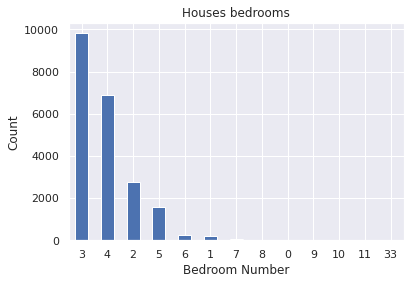

In [ ]:
# Bar chart
# plot bar graph of bedrooms
# plotting graph to check the type of field that game was played
estate['bedrooms'].value_counts().plot(kind='bar',rot=0)
plt.xlabel('Bedroom Number')
plt.ylabel('Count')
plt.title('Houses bedrooms')
plt.show()

From the above bar chart we can tell that most of the houses has 3 bedrooms the 4 bedrooms the list is 9 bedrooms

In [296]:
# Top 10 place with highest summation of house price
# group by year built
zip=estate.groupby(['zipcode']).sum().reset_index()
# line gragh for both  return and taken
zip2=zip.nlargest(10,['price'])
zip2

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
3,98004,430018105.0,1222,801.25,922160,4154038,454.0,1,97,1108,2754,767090,155070,624956,65982,847880,4059192
5,98006,427664400.0,1910,1270.25,1436081,6659862,725.0,4,316,1819,4371,1143301,292780,983402,40038,1384945,6047676
28,98052,370370186.0,2076,1357.25,1356738,6384035,907.5,3,37,1907,4702,1206728,150010,1139593,15986,1339559,5777412
49,98115,361427439.0,1868,1088.25,1069977,3173936,828.0,1,117,2048,4292,820235,249742,1136224,79763,986211,3082015
42,98103,352199365.0,1842,1164.75,993800,2096432,1100.0,0,87,2097,4461,845837,147963,1175760,65780,917540,2090339
21,98033,347324034.0,1538,1008.25,1028739,4533327,646.5,4,129,1506,3489,890293,138446,854671,45873,954542,4284700
25,98040,336954366.0,1136,766.00,876127,3864659,424.5,12,221,1068,2527,697761,178366,555955,65868,817446,3609962
51,98117,318989649.0,1670,1002.50,935698,2563923,806.0,0,101,1957,4027,737348,198350,1077394,47969,851620,2565780
37,98074,301833047.0,1595,1100.75,1164419,6395863,753.5,6,77,1375,3833,1072359,92060,875599,14033,1137551,5797202
48,98112,294888293.0,944,638.50,672162,1342426,486.0,0,40,946,2271,539532,132630,523057,60026,613341,1317605


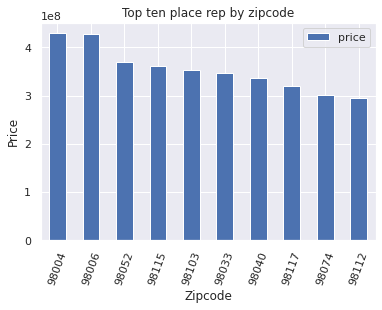

In [300]:
# Draw a vertical bar chart

zip2.plot.bar(x="zipcode", y="price", rot=70);

plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Top ten place rep by zipcode')
plt.show()

#### Bivariate Analysis

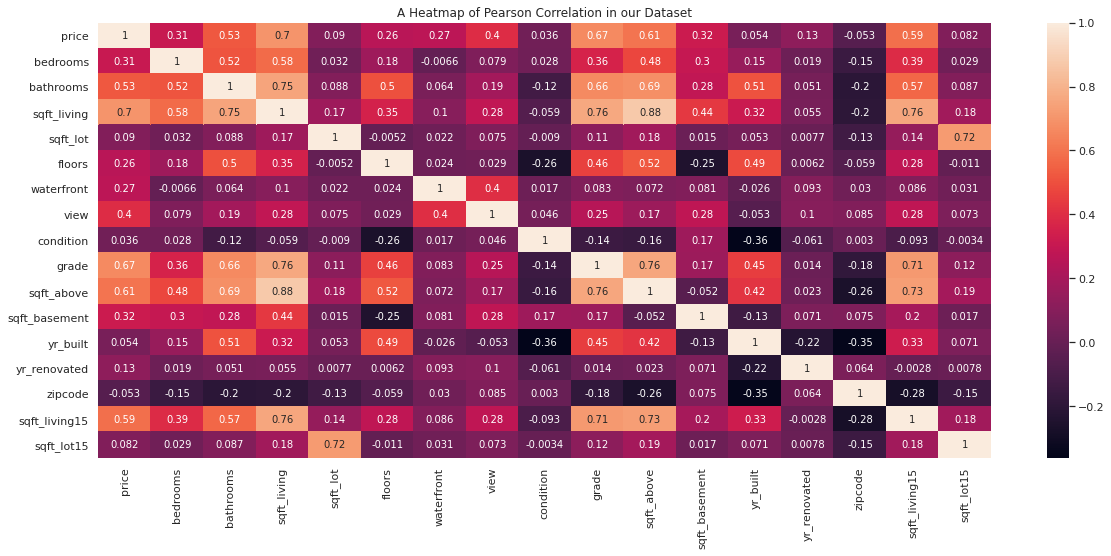

In [ ]:
# Plot heatmap
# 
a = estate.corr() 
plt.figure(figsize = (20,8))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset')
plt.show()
plt.show()

No handles with labels found to put in legend.


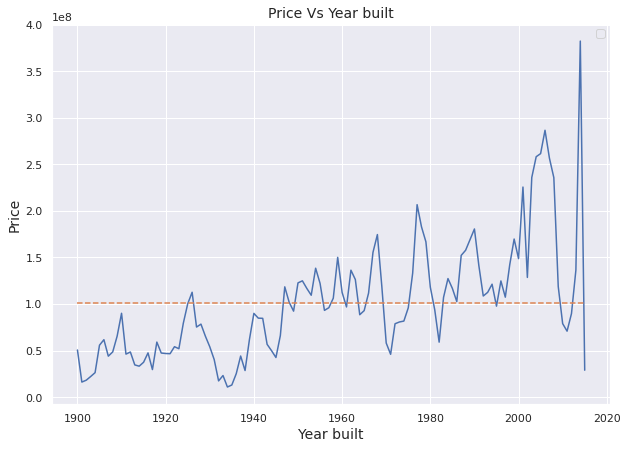

In [ ]:
# group by year built
df=estate.groupby(['yr_built']).sum().reset_index()
# line gragh for both  return and taken

x=df['yr_built']
y=df['price']

fig, ax = plt.subplots(sharex='col', sharey='row', figsize=[10,7])
ax.plot(x,y)

# Calculate the simple average of the data
y_mean = [np.mean(y)]*len(x)

ax.plot(x,y_mean, linestyle='--')

# Make a legend
ax.legend(loc='upper right')

ax.set_xlabel('Year built', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Price Vs Year built', fontsize=14)


ax.grid(True)

# we can see that years before 1950 the house price was below average and after 1860 the house price was above average.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


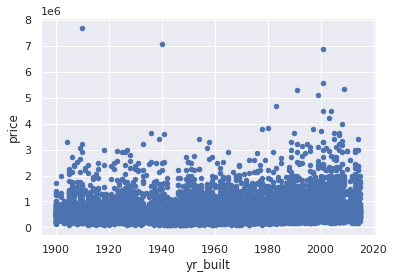

In [ ]:
# Plotting our scatterplot

estate.plot(x='yr_built',y='price', kind='scatter')

# Giving our scatterplot a title
# plt.title('Sepal Width vs Sepal Length')

# Labelling our x axis
# plt.xlabel('Sepal Length (cm)')

# Labelling our y axis
# plt.ylabel('Sepal Width (cm)')

# Displaying our scatterplot
# plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3feb584dd8>,
      dtype=object)

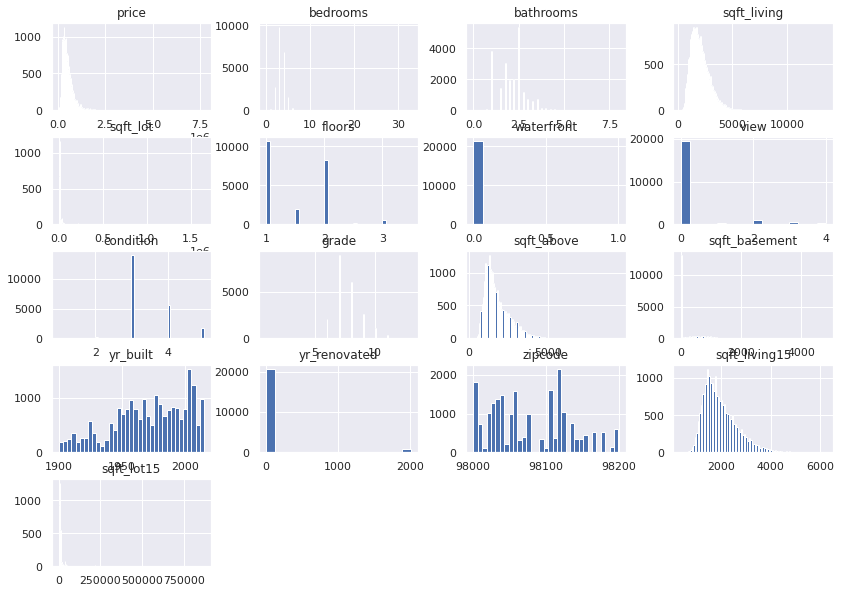

In [ ]:
estate.hist(bins='auto', figsize=[14,10])

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(estate)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### Multivariate Analysis

**PCA**

In [ ]:
df_pca=estate
#  Preprocessing
# 
X = df_pca.drop(['price'], axis=1)
y = df_pca['price']

In [ ]:
# Splitting the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Normalization
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Applying PCA
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Explained Variance Ratio
# 
explained_variance = pca.explained_variance_ratio_

explained_variance

array([3.17257322e-01, 1.24585321e-01, 1.07560875e-01, 8.21321503e-02,
       6.65298360e-02, 5.63855503e-02, 5.19344077e-02, 4.29633284e-02,
       3.73080396e-02, 3.21089597e-02, 2.07576048e-02, 1.71613452e-02,
       1.60980890e-02, 1.45731493e-02, 1.26440218e-02, 4.05910550e-33])

In [ ]:
# Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#  Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 

# resulting in 0.948634891254049% accuracy.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.00948634891254049


In [ ]:
var=[3.17257322e-01+1.24585321e-01+ 1.07560875e-01+ 8.21321503e-02+
       6.65298360e-02+ 5.63855503e-02+ 5.19344077e-02]#+ 4.29633284e-02+
      #  3.73080396e-02+ 3.21089597e-02+ 2.07576048e-02+ 1.71613452e-02+
      #  1.60980890e-02+ 1.45731493e-02+ 1.26440218e-02+ 4.05910550e-33]
var

[0.8063854623]

The determinant factors in pca to give 80% are

price    
bedrooms  
bathrooms     
sqft_living    
sqft_lot  
floors    
waterfront             

## Feature Engineering

## Implementing the Solution

In [ ]:
# Let's display the correlations between the variables
corr = estate.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.280404,0.072577
condition,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.092854,-0.003424
grade,0.667478,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.713208,0.119265


The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself.

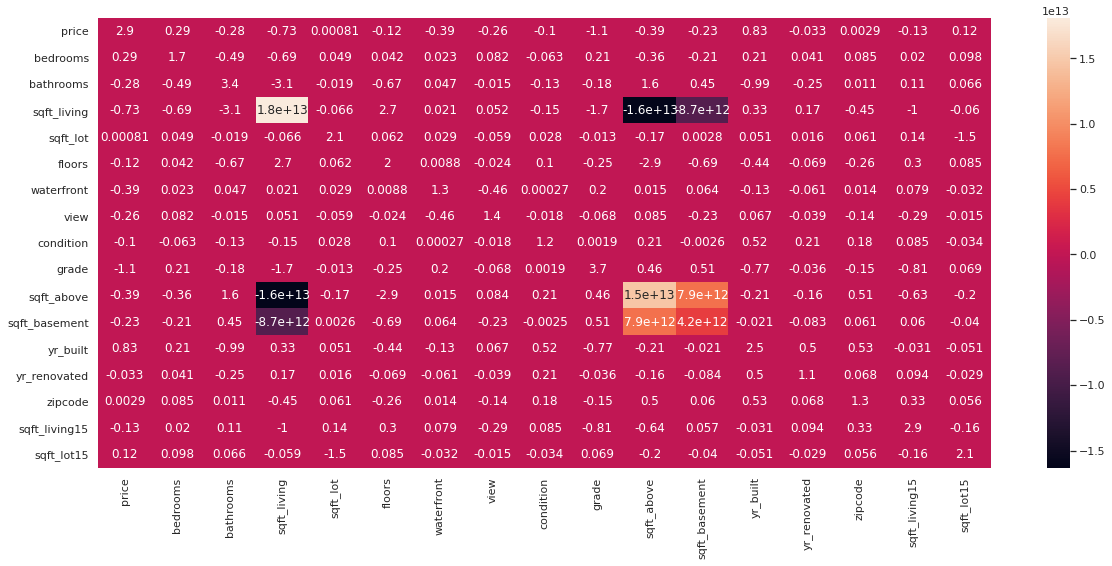

In [ ]:
#computing the VIF(which is the inverse of the correlation matrix)
VIF_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
# plt.figure(figsize = (20,8))
sns.set(rc={'figure.figsize':(20,8.27)})
sns.heatmap(VIF_df, annot = True)


plt.show()

### Multiple Linear Regression

In [286]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Get the features for X and y
X = house.drop('price',axis=1)
y = house.price

from sklearn.linear_model import LinearRegression

# Split the dataset into train and test sets
X_train, X_test, y_train_l, y_test_l = train_test_split(X, y, random_state=0,test_size=0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit linear Regression to the dataset
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_l)


y_pred = linear_model.predict(X_test)
print('R square is', r2_score(y_test_l,y_pred))

print("Mean squared error: ",mean_squared_error(y_test_l, linear_predict))
print("Mean absolute error: ", mean_absolute_error(y_test_l, linear_predict))

R square is 0.6395070464181158
Mean squared error:  31365494844.958237
Mean absolute error:  124039.98371633013


Our Rsquare score is very low so we will have to try other algorithm to find if we can improve how model.

**Residual plots and heteroskedasticity testing**

In [ ]:
residuals = np.subtract(linear_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-6299.404950351015

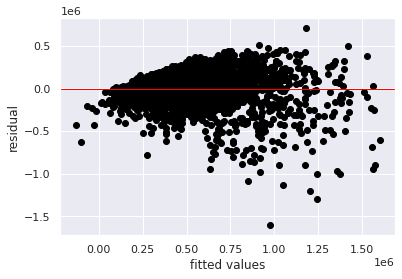

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(linear_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.

Since our points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(linear_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(linear_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
# print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


### Quantile Regression

In [307]:
import numpy as np
#Get the features for X and y
X = estate.bedrooms
y = estate.price
# We will use the python package statsmodels for Quantile Regression

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile

mod = smf.quantreg('y ~ X', estate)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.04633
Model:                       QuantReg   Bandwidth:                   4.016e+04
Method:                 Least Squares   Sparsity:                    5.565e+05
Date:                Fri, 19 Feb 2021   No. Observations:                21610
Time:                        16:01:05   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7116.396     25.294      0.000    1.66e+05    1.94e+05
X             8.5e+04   2035.111     41.767      0.000     8.1e+04     8.9e+04


In [310]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0  0.1  119799.999998   40050.000001    37230.100748    42869.899253
1  0.2  134999.999998   50000.000001    47090.337138    52909.662863
2  0.3  149750.000007   61049.999999    57639.130857    64460.869140
3  0.4  165000.000001   72500.000000    68716.436956    76283.563044
4  0.5  179999.999994   85000.000002    81011.031417    88988.968587
5  0.6  188333.333332  101666.666667    96935.830917   106397.502417
6  0.7  189574.999995  122712.500002   117858.065984   127566.934021
7  0.8  191000.000003  151999.999998   145541.134223   158458.865774
8  0.9  150000.000001  215000.000000   203156.804610   226843.195389


### Ridge Regression

**Model 1 with Parameters**

In [264]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Get the features for X and y
X = house.drop('price',axis=1)
y = house.price

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',
                      n_jobs=1,refit=True,cv=10)

# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
a=search.fit(X,y)
a.fit(X_train, y_train)
r_pred = a.predict(X_test)
print('Ridge R square is', r2_score(y_test,r_pred))

print("Ridge Mean squared error: ",mean_squared_error(y_test, r_pred))

print('x'*50)

print('Linear R square is', r2_score(y_test_l,y_pred))
print("Linear Mean squared error: ",mean_squared_error(y_test_l, linear_predict))

Ridge R square is 0.6394912375819899
Ridge Mean squared error:  31366870328.06571
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Linear R square is 0.6395070464181158
Linear Mean squared error:  31365494844.958237


**model 2 without parameters**

In [265]:
## training the model

ridgeReg = Ridge(alpha=0.001, normalize=True)

ridgeReg.fit(X_train,y_train)

r2 = ridgeReg.predict(X_test)

# calculating mse and r score

print('Model 2 Ridge R square is', r2_score(y_test,r2))

print("Model 2 Ridge Mean squared error: ",mean_squared_error(y_test, r2))

print('x'*50)

print('Linear R square is', r2_score(y_test_l,y_pred))
print("Linear Mean squared error: ",mean_squared_error(y_test_l, linear_predict))

print('x'*50)

print('Model 1 Ridge R square is', r2_score(y_test,r_pred))

print("Model 1 Ridge Mean squared error: ",mean_squared_error(y_test, r_pred))

Model 2 Ridge R square is 0.6394912375819899
Model 2 Ridge Mean squared error:  31366870328.06571
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Linear R square is 0.6395070464181158
Linear Mean squared error:  31365494844.958237
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Model 1 Ridge R square is 0.6394912375819899
Model 1 Ridge Mean squared error:  31366870328.06571


Ridge model 1 and 2 are the same but both have large MSE error that Linear Regression so Linear Regression is better. Next we will compare Linear and Lasso to find that has less MSE error.

### Lasso Regression


**Model 1 With Parameters**

In [269]:
from sklearn.linear_model import Lasso
from sklearn import linear_model

#Get the features for X and y
X = house.drop('price',axis=1)
y = house.price

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2',cv=10) 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 

l = gridlasso.predict(X_test)


print('Lasso R square is', r2_score(y_test,l))

print("Lasso Mean squared error: ",mean_squared_error(y_test, l))

print('x'*50)

print('Linear R square is', r2_score(y_test_l,y_pred))
print("Linear Mean squared error: ",mean_squared_error(y_test_l, linear_predict))

Lasso R square is 0.6441663563640272
Lasso Mean squared error:  31830879877.25831
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Linear R square is 0.6395070464181158
Linear Mean squared error:  31365494844.958237


Linear has less MSE error that this lasso model so we will choose linear and compare with the othe model of lasso that has no parameters

**Lasso Model 2 without parameters**

In [276]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lassoReg = Lasso(alpha=1, normalize=True)

lassoReg.fit(X_train,y_train)

lasso_model2 = lassoReg.predict(X_test)

# calculating mse
print('Lasso Model2 R square is', r2_score(y_test,lasso_model2))

print("Lasso Model2 Mean squared error: ",mean_squared_error(y_test, lasso_model2))
print('x'*50)
print('Lasso Model1 R square is', r2_score(y_test,l))

print("Lasso Model1 Mean squared error: ",mean_squared_error(y_test, l))

print('x'*50)

print('Linear R square is', r2_score(y_test_l,y_pred))
print("Linear Mean squared error: ",mean_squared_error(y_test_l, linear_predict))


Lasso Model2 R square is 0.6440727298668951
Lasso Model2 Mean squared error:  31839255178.01145
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Lasso Model1 R square is 0.6441663563640272
Lasso Model1 Mean squared error:  31830879877.25831
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Linear R square is 0.6395070464181158
Linear Mean squared error:  31365494844.958237


Still the Multilinear is better than both model for lasso

### Elastic Net Regression

**Model 1 with Parameters**

In [278]:
from sklearn.linear_model import ElasticNet
#Get the features for X and y
#Get the features for X and y
X = house.drop('price',axis=1)
y = house.price

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X_train,y_train)
search.best_params_
abs(search.best_score_)

enet = search.predict(X_test)

print('Elastic Net Model1 R square is', r2_score(y_test,enet))

print("Elastic Net Model1 Mean squared error: ",mean_squared_error(y_test, enet))

print('x'*50)

print('Linear R square is', r2_score(y_test_l,y_pred))
print("Linear Mean squared error: ",mean_squared_error(y_test_l, linear_predict))

Elastic Net Model1 R square is 0.6384025099876898
Elastic Net Model1 Mean squared error:  31461597504.85872
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Linear R square is 0.6395070464181158
Linear Mean squared error:  31365494844.958237


**Model 2 without Parameters**

In [285]:
elastic=ElasticNet(normalize=True,alpha=0.000001,l1_ratio=0.75)
elastic.fit(X_train,y_train)
em2=elastic.predict(X_test)
print('Elastic Net Model2 R square is', r2_score(y_test,em2))

print("Elastic Net Model2 Mean squared error: ",mean_squared_error(y_test, em2))

print('x'*50)

print('Linear R square is', r2_score(y_test_l,y_pred))
print("Linear Mean squared error: ",mean_squared_error(y_test_l, linear_predict))

Elastic Net Model2 R square is 0.6394352569665158
Elastic Net Model2 Mean squared error:  31371741046.587727
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Linear R square is 0.6395070464181158
Linear Mean squared error:  31365494844.958237


Still the Multilinear has less MSE error so Multilinear is the best of all the three regression.

## Follow up questions

a). Did we have the right data?


We had the right data since we were able to get some insights from it. it also helps in doing a predictive model of deferent regression models which was not what was expected.

b). Do we need other data to answer our question?

We needed other data to help in increasing the accurecy of our model

c). Did we have the right question?

Yes, Questions were correct since we were able to answer them.

## Conclusion

Multiple Linear Regression was the best model of all the 4 regression model because it's MSE error was smaller than all the others.Still Multilple Linear Regression was not a good algorithm to be used in this dataset, because this its accuracy was 63.95% which is very low